### XGBoost Algorithm

1. XGBoost is an optimized ensemble technique that is an improvised version of the Random Forest.

2. It combines multiple decision trees and builds them in an intelligent and sequential manner.


Xgboost Algorithm is used over Random Forest because:-

1. It combines multiple decision trees and builds them in an intelligent and in a sequential manner by correcting the previous errors that had occurred in the earlier decision trees.


2. It improves the accuracy of the model by minimizing the loss function of the model


3. It prevents the overfitting of the model.


### To perform the XGBoost Algorithm on the Breast Cancer Dataset

### Steps Covered

1.  Import all the necessary  Libraries

2.  Loading the Dataset

3.  Data Exploration

4.  Data Preprocessing (Handling missing values, encoding categoricaldata) 

5. Divide the dataset into independent and dependent features and feature scaling on the inputs

6. Splitting the Data into training and testing data

7. Scale the inputs

8.  Training XGBoost Classifier

9.  Making Predictions

10.  Evaluating the Model

11. Confusion Matrix Visualization

12. Feature Importance Plot

13. To predict the diagnosis of the cancer of the patient

### Step 1:  Import all the necessary  Libraries

In [4160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing   import StandardScaler
from   xgboost                 import XGBClassifier
from   sklearn.metrics         import accuracy_score , confusion_matrix, classification_report

### Step 2: Loading the Dataset

In [4161]:
df = pd.read_csv('xgboostdata.csv')

In [4162]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### OBSERVATIONS:

1. The above dataset depicts about the breast cancer detection and  predicts the type of breast cancer diagnosis present in the breast cancer data.

      (a.)  M ------------------> Malignant (Cancerous)

      (b.)  B ------------------> Benign    (Non-Cancerous)


2. It has a total of 569 rows and 32 columns.

3. Here all the attributes are the inputs except the diagnosis 

    (a.) Diagnosis is the output that depicts about the type of the breast cancer diagnosis.

### Step 3:  Data Exploration

In [4163]:
### Total number of records in the dataset

print("Total number of records in the dataset is:", len(df))

Total number of records in the dataset is: 569


In [4164]:
### Shape of the dataset

print(df.shape)

(569, 32)


In [4165]:
### Display the top five rows of the dataset

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4166]:
### Display the bottom five rows of the dataset

df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4167]:
### Get the columns used in the dataset

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4168]:
### get the information about all the columns used in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4169]:
### get the statistical summary of the dataset

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### OBSERVATIONS:

1.  The above data depicts about the statistical summary about all the numerical columns in the dataset.

### Step 4: Data Preprocessing (Handling missing values, encoding categoricaldata) 

In [4170]:
### Check if there are any NULL Values in the dataset

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [4171]:
### Check for any duplicate records in the dataset

df[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


### OBSERVATIONS:

1.  There are no duplicate records in the dataset.

In [4172]:
### get the counts of the target values

df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### OBSERVATIONS:

1. There are a total of 357 Benign cancer records    and is non-cancerous .

2. There are a total of 212 Malignant cancer records and is cancerous.

In [4173]:
### Encoding all the categorical data

from sklearn.preprocessing import LabelEncoder

### create an object for Label Encoder

label = LabelEncoder()


df['diagnosis'] = label.fit_transform(df['diagnosis'])

In [4174]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### OBSERVATIONS:

1. After performing the Label encoding process on the diagnosis columns, we can see that

    (a.)   The Benign Cancer Value has been converted to 0.

    (b.)   The Malignant Cancer Value has been converted to 1.

In [4175]:
# Drop irrelevant columns (id)


df_new = df.drop(columns='id', axis=1)

In [4176]:
df_new

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### OBSERVATIONS:

1.  The 'id' column that was unnecessary in the dataset is now removed.

### Step 5: Divide the dataset into independent and dependent features and feature scaling on the inputs

In [4177]:
### Independent features

X = df_new.drop(columns= ['diagnosis'], axis=1)

### Dependent features

Y = df_new['diagnosis']

In [4178]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4179]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [4180]:
Y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### OBSERVATIONS:


1. The dataset is divided into two parts:-

   (a.)  input ---> It is denoted by X. It has all the breast cancer details.

   (b.)  output --->It is denoted by Y. The diagnosis of the breast cancer.

### Step 6: Splitting the Data into training and testing data

In [4181]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [4182]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [4183]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,...,12.82,15.97,83.74,510.5,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.3172,0.69910,0.21050,0.3126,0.07849
375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,16.97,19.14,113.10,861.5,0.1235,0.2550,0.21140,0.12510,0.3153,0.08960
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.06390,...,16.33,30.86,109.50,826.4,0.1431,0.3026,0.31940,0.15650,0.2718,0.09353
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740


In [4184]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (455, 30)
Shape of the input testing  data is: (114, 30)


In [4185]:
Y_train

10     1
170    0
407    0
430    1
27     1
      ..
37     0
415    0
458    0
476    0
335    1
Name: diagnosis, Length: 455, dtype: int64

In [4186]:
Y_test

120    0
250    1
375    0
99     1
455    0
      ..
381    0
534    0
448    0
205    1
75     1
Name: diagnosis, Length: 114, dtype: int64

In [4187]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (455,)
Shape of the output testing  data is: (114,)


### OBSERVATIONS:

1. Here the data is divided into the training and testing data.

2. Stratify is used in the output so as to make the proportions of the outputs in both the training and testing data equal.

3. The data has 80 % of the training data and 20 % of the testing data.

### Step 7: Scale the inputs

In [4188]:
from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

### using the object for Standard Scaler, transform the inputs

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled  = sc.transform(X_test)

In [4189]:
X_train_scaled

array([[ 0.51855873,  0.89182579,  0.4246317 , ..., -0.23574392,
         0.05456632,  0.02183673],
       [-0.51636409, -1.63971029, -0.54134872, ..., -0.32320788,
        -0.13757624, -0.90440164],
       [-0.36811839,  0.45551496, -0.38824993, ..., -0.89082504,
        -0.675893  , -0.14401559],
       ...,
       [-0.32616206,  1.33280304, -0.38905998, ..., -0.84289958,
        -0.96490082, -1.16888375],
       [ 0.00948859,  0.25952507,  0.00786279, ...,  0.27571059,
        -0.60284707, -0.30545988],
       [ 0.80945595,  0.36918608,  0.79320285, ...,  1.00657384,
        -0.46151907, -0.44817001]], shape=(455, 30))

In [4190]:
X_test_scaled

array([[-0.77089916, -2.00602473, -0.76451652, ..., -0.38805702,
         0.16254727,  0.06095804],
       [ 1.89472636,  0.96648861,  1.89081582, ...,  1.42292627,
         0.33722232, -0.31041892],
       [ 0.56051506, -0.78108791,  0.57044007, ...,  0.14391558,
         0.38009711,  0.30174696],
       ...,
       [ 0.10179251, -0.01812727,  0.08238707, ..., -0.29280517,
        -0.70288824, -0.52310661],
       [ 0.26682074, -0.63876192,  0.26586259, ...,  0.14541325,
         0.79614133,  0.73153038],
       [ 0.53254417,  0.05420233,  0.48133495, ...,  0.54678897,
        -0.41864428, -1.11598733]], shape=(114, 30))

### OBSERVATIONS:

1.  All the inputs of both the training and the testing data has been scaled in one range.

2. Here a library named StandardScaler is imported from preprocessing module

3. An object is created from StandardScaler library

4. Using the object for standard scaler, we have transformed the inputs of the training and testing data in one range so that this data can be easily be trained by the model.

### Step 8: Train the  XGBoost Classifier

In [4191]:
### call the xgbclassifier function

from xgboost import XGBClassifier

xgbmodel = XGBClassifier(
        n_estimators       =   100         ,
        learning_rate      =   0.1         ,
        max_depth          =    4          ,
        random_state       =   42          ,
        use_label_encoder  =  False        ,
        eval_metric        =  'logloss'          
)

### train the xgbmodel model

xgbmodel.fit(X_train_scaled, Y_train)

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [23:57:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


### OBSERVATIONS:

1. The XGBClassifier is trained with the help of the training data.

### Step 9: Making Predictions

In [4192]:
Y_pred = xgbmodel.predict(X_test_scaled)

In [4193]:
Y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [4194]:
Y_test   ### Series

120    0
250    1
375    0
99     1
455    0
      ..
381    0
534    0
448    0
205    1
75     1
Name: diagnosis, Length: 114, dtype: int64

In [4195]:
Y_test = Y_test.to_numpy()  ### Series -----> Numpy

In [4196]:
Y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [4197]:
Y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [4198]:
### Combine the Actual and Predicted Results in a dataframe

df_results = pd.DataFrame({
    'Actual_Results'  :  Y_test        ,
    'Predicted_Results' : Y_pred
})


print(df_results.head())

   Actual_Results  Predicted_Results
0               0                  0
1               1                  1
2               0                  0
3               1                  1
4               0                  0


### Step 10: Evaluating the Model

In [4199]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(Y_test, Y_pred)

print("Accuracy score of the model is:", (ac * 100.0))

Accuracy score of the model is: 97.36842105263158


In [4200]:
cm = confusion_matrix(Y_test,Y_pred)

print(cm)

[[72  0]
 [ 3 39]]


In [4201]:
cr = classification_report(Y_test, Y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Step 11: Confusion Matrix Visualization

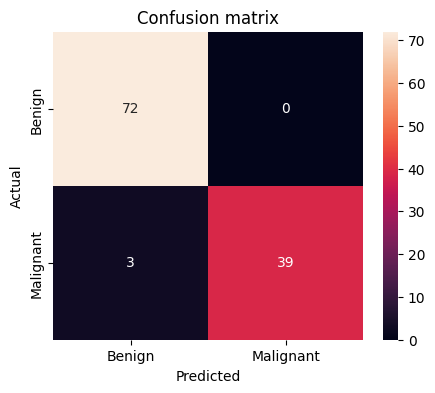

In [4202]:
plt.figure(figsize=(5,4))

sns.heatmap(cm, fmt='d',annot=True, xticklabels = ['Benign','Malignant'], yticklabels = ['Benign','Malignant'])

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion matrix')

plt.show()

### OBSERVATIONS:

1. The above graph represents the graphical representation of the confusion matrix with the accuracy rate = 97 %.

2. There are 3 False negatives as shown in the diagram that specifies that there might be 3 missed malignant cases might be serious in a real-world medical scenario

### Step 12: Feature Importance Plot


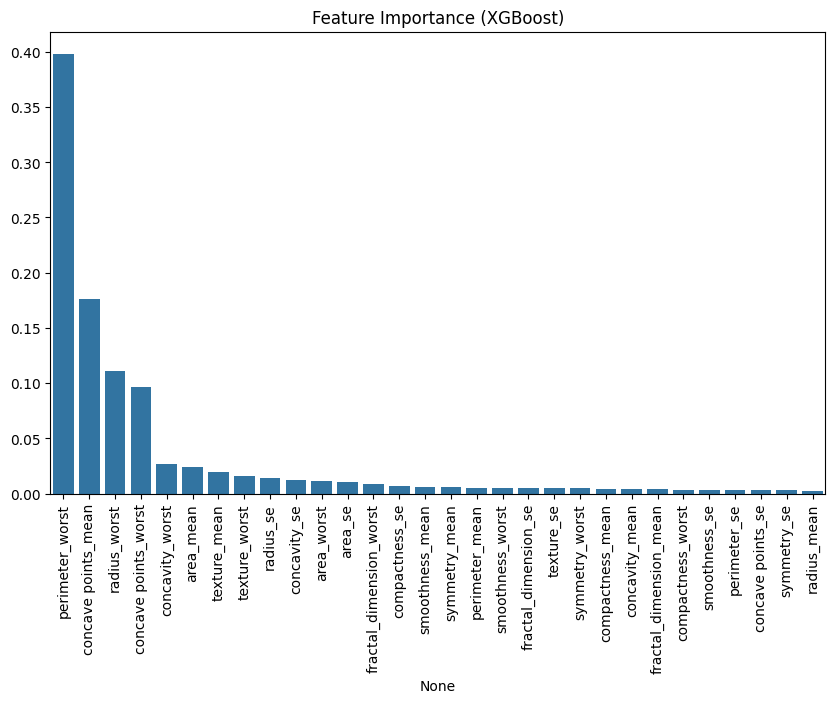

In [4203]:
plt.figure(figsize=(10,6))
importances = xgb_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = X.columns[sorted_idx]
sns.barplot(x=X.columns[sorted_idx], y=xgb_model.feature_importances_[sorted_idx])
plt.xticks(rotation=90)
plt.title('Feature Importance (XGBoost)')
plt.show()

### OBSERVATIONS:

1. The above graph is a bar graph tht species the feature importance score of the dataset

2. In the X axis we have features as the input and in the Y axis qwe have feature imporatance score as the output.

3. This graph explain the imporance scores of all the features in the decreasing order.

### Step 13: To predict the diagnosis of the cancer of the patient

In [4204]:
new_sample = pd.DataFrame([[
    17.99, 10.38, 122.8, 1001.0, 0.1184,
    0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399,
    0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019.0, 0.1622,
    0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]], columns=X.columns)



### Transform the sample data

transformed_data = sc.transform(new_sample)

print(transformed_data)

[[ 1.0695852  -2.1086861   1.23872841  0.94833476  1.56758931  3.22677897
   2.58449252  2.4742588   2.18725303  2.29719045  2.35908348 -0.56657462
   2.67704288  2.31985585 -0.17403396  1.34717516  0.68505636  0.66525774
   1.15682183  0.92311413  1.84418586 -1.4120031   2.24789155  1.93986479
   1.2840114   2.59167824  2.06168697  2.24514743  2.67945602  1.9161898 ]]


In [4205]:
### predict the output for the sample data

prediction = xgbmodel.predict(transformed_data)[0]

In [4206]:
prediction

np.int64(1)

In [4207]:
if(prediction == 1):
    print("\n Prediction : Malignant (Cancerous)")
else:
    print("\n Prediction : Benign (Non Cancerous)")


 Prediction : Malignant (Cancerous)


### OBSERVATIONS:

1.  A new sample test data is considered.

2. It is transformed using standard scaler

3. Then the predicted output is obtained with the help of xgb model and the transformed data.

4. If the prediction is 1 then Malignant else Benign.

5. The final output obtained is Malignant.